In [1]:
# Ignoring warning messages from python
import warnings
warnings.filterwarnings('ignore')

# General use imports
import pandas as pd
import numpy as np


# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Classification performance measuring imports
from sklearn import metrics

# Connection to Codeup database
import env

In [2]:
# function to deal with parsing one entry in our log data

def parse_log_entry(entry):
    parts = entry.split()
    output = {}
    output['ip'] = parts[0]
    output['timestamp'] = parts[3][1:].replace(':', ' ', 1)
    output['request_method'] = parts[5][1:]
    output['request_path'] = parts[6]
    output['http_version'] = parts[7][:-1]
    output['status_code'] = parts[8]
    output['size'] = int(parts[9])
    output['user_agent'] = ' '.join(parts[11:]).replace('"', '')
    return pd.Series(output)

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/logs'
df = pd.read_sql('SELECT * FROM api_access', url)
# df = pd.concat([df.entry, df.entry.apply(parse_log_entry)], axis=1)
df = df.entry.apply(parse_log_entry)
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [3]:
# Function that returns the count and percent of request from ip addresses

def value_counts_and_frequencies(s: pd.Series, dropna=True) -> pd.DataFrame:
    return pd.merge(
        s.value_counts(dropna=False).rename('count'),
        s.value_counts(dropna=False, normalize=True).rename('proba'),
        left_index=True,
        right_index=True,
    )

In [4]:
# Assigning the function result to a df and displaying it

ip_df = value_counts_and_frequencies(df.ip)
ip_df

,count,proba
97.105.19.58,11998,0.858595
173.173.113.51,1059,0.075784
72.181.113.170,613,0.043867
72.181.105.81,246,0.017604
24.26.242.9,21,0.001503
68.201.219.223,21,0.001503
70.121.214.34,2,0.000143
52.87.230.102,2,0.000143
35.175.171.137,2,0.000143
54.145.52.184,1,0.000072


<AxesSubplot:>

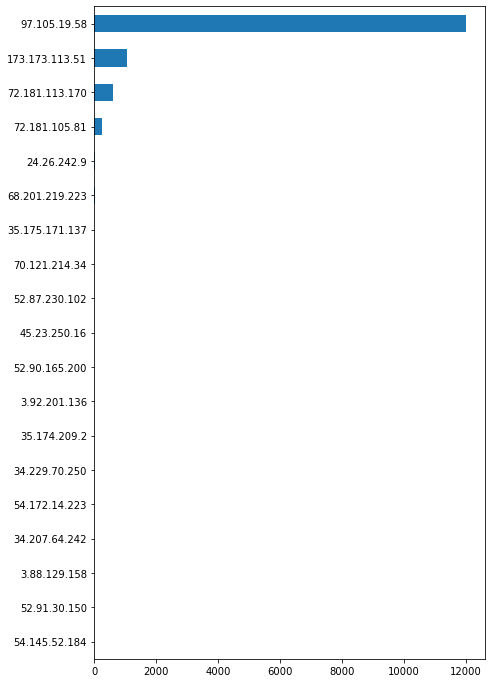

In [5]:
# Plotting the above df

ip_df['count'].sort_values().plot.barh(figsize=(7, 12))

<AxesSubplot:>

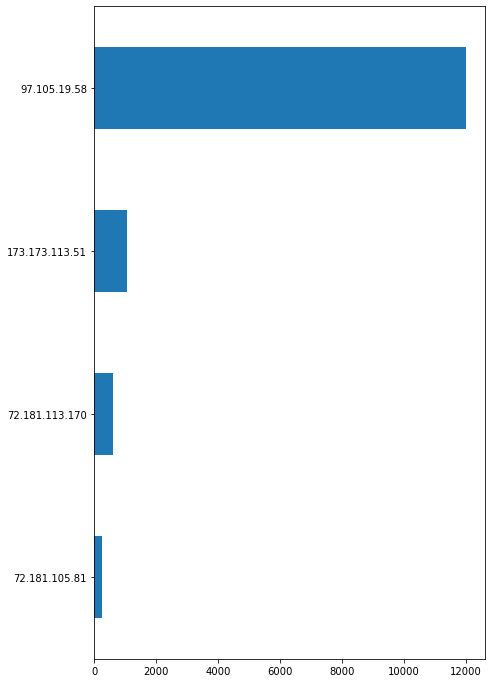

In [6]:
# Zooming into the biggest values

ip_df['count'].sort_values().tail(4).plot.barh(figsize=(7, 12))

<AxesSubplot:>

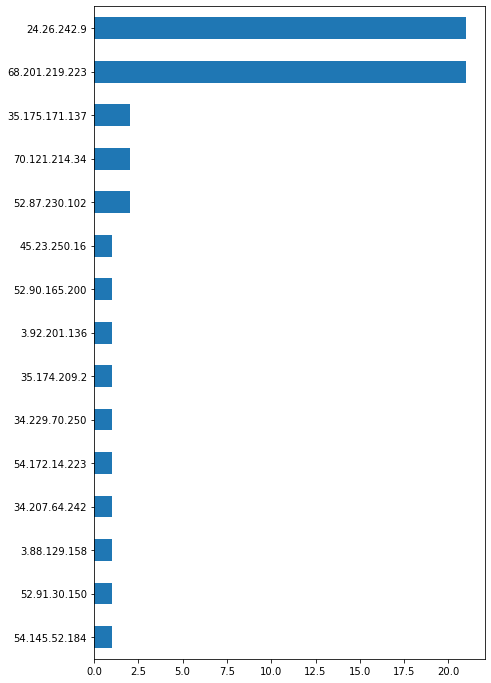

In [7]:
# Zooming into the smallest values

ip_df['count'].sort_values().head(-4).plot.barh(figsize=(7, 12))

In [10]:
# Looking for unexpected status in ip requests 

status_given_ip = (
    df.groupby('ip')
    .status_code.value_counts(normalize=True)
    .rename('proba_status_given_ip')
    .reset_index()
)
status_given_ip

,ip,status_code,proba_status_given_ip
0,173.173.113.51,200,1.000000
1,24.26.242.9,200,1.000000
2,3.88.129.158,200,1.000000
3,3.92.201.136,200,1.000000
4,34.207.64.242,200,1.000000
5,34.229.70.250,200,1.000000
6,35.174.209.2,200,1.000000
7,35.175.171.137,200,1.000000
8,45.23.250.16,200,1.000000
9,52.87.230.102,200,1.000000


In [11]:
df.head()

,ip,timestamp,request_method,request_path,http_version,status_code,size,user_agent
0,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/sales?page=81,HTTP/1.1,200,512495,python-requests/2.21.0
1,97.105.19.58,16/Apr/2019 19:34:42,GET,/api/v1/items,HTTP/1.1,200,3561,python-requests/2.21.0
2,97.105.19.58,16/Apr/2019 19:34:44,GET,/api/v1/sales?page=82,HTTP/1.1,200,510103,python-requests/2.21.0
3,97.105.19.58,16/Apr/2019 19:34:46,GET,/api/v1/sales?page=83,HTTP/1.1,200,510003,python-requests/2.21.0
4,97.105.19.58,16/Apr/2019 19:34:48,GET,/api/v1/sales?page=84,HTTP/1.1,200,511963,python-requests/2.21.0


In [15]:
df.shape

(13974, 8)

In [14]:
for code in df['status_code']:
    if df['status_code'] == '1%%':
        print('No errors, request received')
    elif df['status_code'] == '2%%':
        print('No errors, successful request')
    elif df['status_code'] == '3%%':
        print('Potential error: 301 Redirect,\
                                301 Moved Permanently,\
                                302 Found,\
                                303 See Other,\
                                304 Not Modified,\
                                307 Temporary Redirect')
    elif df['status_code'] == '4%%':
        print('Client Error Status Codes: 400 Bad Request,\
                                          401 Unauthorized,\
                                          403 Forbidden,\
                                          404 Not Found,\
                                          405 Method Not Allowed,\
                                          417 Expectation Failed')
    elif df['status_code'] == '5%%':
        print('Server Error Status Codes: 500 Internal Server Error\
                                          501 Not Implemented,\
                                          503 Service Unavailable,\
                                          504 Gateway Timeout,\
                                          505 HTTP Version Not Supported')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
1XX informational response (request received) - no errors
2XX successful request (request understood and accepted) - no errors
3xx Redirection Codes
301 Redirect or 301 Moved Permanently
302 Found
303 See Other
304 Not Modified
307 Temporary Redirect
4xx Client Error Status Codes
400 Bad Request
401 Unauthorized
403 Forbidden
404 Not Found
405 Method Not Allowed
417 Expectation Failed
5xx Server Error Status Codes
500 Internal Server Error
501 Not Implemented
503 Service Unavailable
504 Gateway Timeout
505 HTTP Version Not Supported